<center><font size="+4">IProML 2021/2022</font></center>
<center><font size="+4">Introduction to Programming and</font></center>
<center><font size="+4">Machine Learning in Python</font></center>
<center><font size="+4">MODULE 2</font></center>
<center><font size="+2">Scuola Normale Superiore, Pisa, Italy</font></center>

<center><font size="+2">Course responsibles</font></center>
<center><font size="+2">Andrea Vandin <a href= "mailto:a.vandin@santannapisa.it">a.vandin@santannapisa.it</a>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Daniele Licari <a href= "mailto:a.vandin@santannapisa.it">d.licari@santannapisa.it</a></font></center>

---

<center><font size="+2">Part 2</font></center>
<center><font size="+1">Breast Cancer Diagnosis 3</font></center>
<center><font size="+1">Supervised learning: Classification</font></center>

---
---

**This notebook provides an overview of supervised learning pipeline**

   * use Scikit-learn library package for classification task
   * understand metrics of classification performance evaluation
   * demonstrate the problem of model overfitting.
   * tune the hyperparameters and model validation

This notebook presents Python programming examples for machine learning supervised: splitting data, predictive models, decision boundary, evaluation, cross-validation, hyperparameters tuning.  
You can find more details in the [APPENDIX](#APPENDIX) of this document.

**References** 
This notebook is mainly based on the following books:

* [Statistics and Machine Learning in Python, E.Duchesnay, T.Löfstedt, F.Younes](https://duchesnay.github.io/pystatsml/)
* [Topics in Statistical Learning, Francesca Chiaromonte](https://github.com/EMbeDS-education/StatsAndComputing20202021/tree/main/TSL/slides)
* [Introduction to Data Mining (2nd Edition), Pang-Ning Tan et al.](https://www.cse.msu.edu/~ptan/)
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-data-science/9781491912126/)
<!-- * [Introduction to Machine Learning Algorithms, KNIME AG](https://www.knime.com/knime-course-material-download-page) -->

Some pictures have been taken from these sources. 

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

In [1]:
from IPython.display import HTML 
#  A Gentle Introduction to Classification Models
HTML('<iframe width="860" height="515" src="https://www.youtube.com/embed/iDQz6FBpxZA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\d.licari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# A Visual Introduction to Decision Tree
Supervised learning models tries to learn the relationship between measured features X of data and some labels y associated with the data. This is further subdivided into:
  - *Classification* tasks, the labels are discrete categories
  - *Regression* tasks, the labels are continuous quantities. 

The following interactive example was written by Stephanie and Tony on R2D3. we will create a machine learning model to distinguish homes in New York from homes in San Francisco. 

It introduces you to the decision boundary, decision tree, test model, and overfitting.


In [95]:
from IPython.display import display, HTML,IFrame 
IFrame(src="http://www.r2d3.us/visual-intro-to-machine-learning-part-1/", width=1224, height=550) # doesn't work on colab

## Gini impurity measure

![](images/gini.png) image from https://youtu.be/u4IxOk2ijSs?t=65

More details how to calculate the gini index for the decsion tree: https://youtu.be/7VeUPuFGJHk?t=428

# Classification of Benign and Malignant Breast Cancer 
We will first take a look at a simple classification task, features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

<img src="images/Breast-Biopsy-2.jpg" >

**Attribute Information**
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

**Classification Task**

We want predict the benign or malignant breast cancer using machine learning 

**Diagnosis Class:**
* malignant
* benign

![alt text](images/fna-benign1.png)
![alt text](images/fna-malignant1.png)

This dataset is also available via the ftp server UW CS: http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/

## Load libraries

In [96]:
# Data Processing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualizzation libs
# keeps the plots in one place. calls image as static pngs
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
from IPython.display import display, Markdown # display Markdown code using Python
import seaborn as sns # data visualization library based on matplotlib

from warnings import filterwarnings
filterwarnings('ignore')


# download the all repository if you are on COLAB
import os
import sys
IN_COLAB = 'google.colab' in sys.modules
COURSE_NAME = 'SNS-IProML2022' 

if IN_COLAB: 
    !git clone https://github.com/EMbeDS-education/{COURSE_NAME}.git
    os.chdir(f'/content/{COURSE_NAME}/jupyter/jupyterNotebooks')

## Load data
Let's load preprocessed data by the Part 1 into Pandas, and get *Features matrix* and *Target array*

In [97]:
#load dataset, we will first load the data into a Pandas DataFrame object and display its content

data = pd.read_csv('data/WBCD_preprocessed.csv', index_col=0)
df_X = data.iloc[:,:-1] # Features matrix
df_y = data.iloc[:,-1] # Target array
data.head()

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,153.40,...,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,74.08,...,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,94.03,...,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
4,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,94.44,...,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant
5,15.70,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.8902,27.19,...,0.02165,0.005082,23.75,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,malignant


In [98]:
# Encode target labels with value 1 for malignant and 0 for benign
dict_lb_to_num = {'malignant': 1, 'benign':0} # set malignat as true class
df_y = df_y.replace(dict_lb_to_num)
df_y.value_counts()

0    352
1    205
Name: target, dtype: int64

## Splitting Data
**We would like to evaluate the model on data it has not seen before**, and so we will split the data into a training set and a testing set. 
1. *Training dataset*: Dataset used to fit the model (set the model parameters like weights).
2. *Test dataset (holdout set)*: Dataset (hold-out) used to provide an unbiased evaluation of a final model fit on the training dataset. 

we hold back a subset of the data from dataset, and then use this holdout set to check the model performance. 

![](images/splitting_1.png)

**We usually split the data around 70%-30% (or 80%-20%) between training and testing sets.**





In [99]:
%%html
<marquee style='width: 30%; color: red;'><b>Important! Golden Rules</b></marquee>

- Never use testing data for fitting an estimator
- Use testing data only for evaluation (please don't touch the testing set)

<!-- <img src='images/training_2.jpg' width='500px'> -->

<div class="alert alert-block alert-warning" style='color:black'>
    
Some classification problems can present a large imbalance in the distribution of target classes. <b>It is important to have the same data distribution across test and training set.</b>
In such cases it is recommended to use <b>stratified sampling</b> to ensure that relative class frequencies is approximately on both sets.

</div>

0    0.631957
1    0.368043
Name: target, dtype: float64


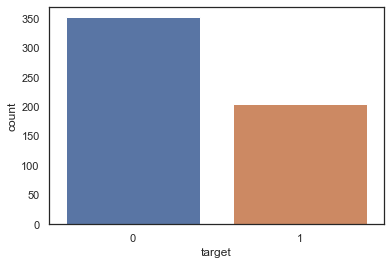

In [100]:
sns.countplot(df_y)
print(df_y.value_counts(normalize=True))


[*sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):
Split arrays or matrices into random train and test subsets

N. Training sample 389, 69.84%
N. Testing sample 168, 30.16%


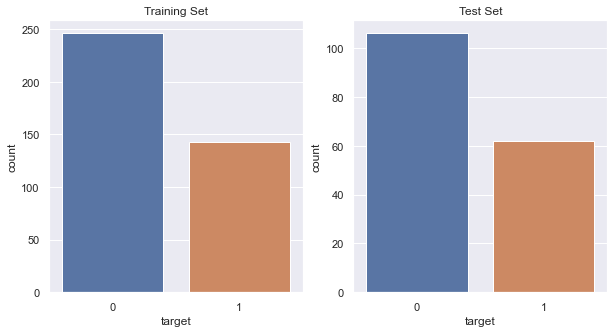

In [101]:
from sklearn.model_selection import train_test_split


# data is splitted 70%-30% in a stratified method on the class labels. 
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_X, df_y, test_size =.3, stratify=df_y, random_state=1) 

print(f"N. Training sample {len(y_train)}, {len(y_train)/len(df_y)*100:.2f}%")
print(f"N. Testing sample {len(y_test)}, {len(y_test)/len(df_y)*100:.2f}%")

# plot target distributions of test and training set
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
ax = sns.countplot(y_train.sort_values())   
ax.set_title("Training Set")
plt.subplot(1, 2, 2)
ax = sns.countplot(y_test.sort_values()) 
ax.set_title("Test Set")
plt.show()


### Scaling
we use the StandardScaler:
* *StandardScaler.fit_transform()* on train set to learn the parameters of scaling (means and standard deviations) on the train data and scale data.
* *StandardScaler.transform()* on test set to scale data based on the  scaling paramaters learned on the train data 

**Our models do not have to rely on parameters learned from the test set**

<div class="alert alert-block alert-warning" style='color:black'>
Including the test dataset in the transform computation will allow information to flow from the test data to the train data and therefore to the model that learns from it, thus allowing the model to cheat (introducing a bias). </div>

In [102]:
from sklearn.preprocessing import StandardScaler #for Scaling the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw) # computes std and mean of each feature and scaling. 
X_test  = scaler.transform(X_test_raw)  # scales the test data.

In [103]:
# # # Standard Scaler

# # # fit on training
x_train_mean = X_train_raw.mean()
x_train_std = X_train_raw.std()

# # # transform training
X_train_raw = (X_train_raw-x_train_mean)/x_train_std

# # # transform testing
(X_test_raw-x_train_mean)/x_train_std

,mean texture,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,texture error,area error,...,concave points error,symmetry error,fractal dimension error,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
527,-1.630677,-0.540470,-0.397671,-0.765074,-0.742709,-0.569286,-0.418052,-0.654795,-1.335388,-0.827037,...,-1.039959,-1.187136,-1.069040,-1.047554,-0.134718,-0.286890,-0.449677,-0.119256,0.391692,-0.441442
356,-0.145416,-0.413822,0.886493,0.528006,0.122108,0.196173,0.875716,0.377291,0.604808,-0.475774,...,1.255616,1.120845,0.972662,-0.125032,0.089497,0.101891,-0.056717,0.168471,0.396954,-0.016201
323,0.540812,1.775579,1.508432,1.624618,2.210552,2.639894,2.872456,0.628983,-0.326746,0.846582,...,0.361717,0.998180,-0.139969,1.033907,1.184194,1.322822,1.335728,2.352442,4.685384,1.111711
18,0.691219,1.763933,0.187518,-0.003975,0.797172,1.204787,-0.818148,-1.269876,-0.338223,2.053382,...,0.629710,-0.884472,-0.772807,0.871887,0.832484,0.429425,1.349798,1.897894,-0.208162,-0.427951
530,-0.387476,-0.673232,0.822885,-0.110948,-0.440251,-0.104987,-0.758320,0.639408,1.364206,-0.222663,...,0.268272,-0.245810,-0.622109,0.392440,0.115876,-0.433349,-0.663242,-0.211084,-0.716810,-0.344663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,-0.833995,-0.138691,-1.130570,-0.904503,-0.856066,-0.567991,-0.791973,-0.985420,-1.030863,-0.540374,...,-0.154876,-1.131136,-0.722575,-1.040941,-1.268982,-0.990557,-1.035097,-0.499423,-1.316664,-0.958768
419,0.517311,-0.797259,0.434173,-0.828259,-1.011134,-0.976098,-0.694754,-0.154390,0.926165,-0.547613,...,-0.966085,0.899514,-0.743231,0.547847,-0.178682,-0.929976,-1.169668,-1.097834,0.156661,-0.716528
125,-0.469729,-0.190515,-0.551742,-0.797915,-0.942873,-0.959266,-0.698493,-0.532672,-0.646000,-0.577686,...,-1.203223,-1.029804,-0.908483,-0.334997,-0.728228,-0.768872,-0.941882,-0.975703,-0.916762,-0.681922
416,0.585464,-1.114897,0.617928,-0.793497,-0.861272,-0.929228,0.838324,0.526221,3.221575,-0.375532,...,-0.522661,1.366177,0.444514,0.931404,0.894034,-0.873390,-1.041077,-1.179867,-0.025750,-0.023826


In [104]:
from IPython.display import HTML 
#  Learning, predicting, and evaluating a Classifier
HTML('<iframe width="860" height="515" src="https://www.youtube.com/embed/6Ry914HqeHI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Supervised Models in scikit-learn
The basic recipe for applying a supervised machine learning model:
1. Choose a class of model

 <del>2. Choose best model hyperparameters </del>(we will see later)
 
3. Fit the model to the training data
4. Use the model to predict labels for new data

[Sklearn contains several supervised machine learning models](https://scikit-learn.org/stable/supervised_learning.html).
We use a Decision Tree Classifier which predicts the value of a target variable by learning simple decision rules (if-then-else) inferred from the data features

In [105]:
from sklearn.tree import DecisionTreeClassifier

# 1. instantiate model
model = DecisionTreeClassifier(random_state=42) 
# 2. fit model to data (training)
model.fit(X_train, y_train)   
# 3. predict on new data 
y_pred = model.predict(X_test)             
y_pred[:10] 

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

# 1. instantiate model
model2 = KNeighborsClassifier() 
# 2. fit model to data (training)
model2.fit(X_train, y_train)   
# 3. predict on new data 
y_pred2 = model2.predict(X_test)             
y_pred2[:10]

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [107]:
from sklearn.svm import LinearSVC
# 1. instantiate model


## Metrics of classification performance evaluation
Let's draw the decision boundary of Decision Tree Classifier trained on the training set

In [108]:
# from src.utils import draw_boundary

# # draw decision boundary for visualization (and teaching) purpose
# draw_boundary(DecisionTreeClassifier(random_state = 42),  X_train, X_test, y_train, y_test,verbose=1)


<div class="alert alert-block alert-success" style='color:black'>
<b>Observations</b>  
Figure above shows what happened when we added new data to the model (Testing set). It turned out that the model did not fit well with the new data. Notice that the model misclassified some of the new data.
</div>

![](images/confusion_matrix_sick.png)
image from [Machine Learning: Testing and Error Metrics](https://www.youtube.com/watch?v=aDW44NPhNw0)

We can use the following metrics:
- *True Positive (TP)*  : Malignant cancer correctly identified as Malignant
- *True Negative (TN)*  : Benign cancer correctly identified as Benign
- *False Positive (FP)* : Benign cancer incorrectly identified as  Malignant
- *False Negative (FN)* : Malignant cancer incorrectly identified as Benign



The four outcomes can be formulated in a 2×2 confusion matrix

![](images/confusion_matrix.png)

* *Accuracy (ACC)*: (TP + TN) / (TP + FP + FN + TN)
* *Sensitivity (SEN)* or Recall of the positive class or true positive rate (TPR) or hit rate: SEN = TP / P = TP / (TP+FN)
* *Specificity (SPC)* or Recall of the negative class or true negative rate: SPC = TN / N = TN / (TN+FP)
* *Precision* or positive predictive value (PPV): PPV = TP / (TP + FP)

<!-- ![](https://miro.medium.com/max/700/1*kaqtNALKZujx1FGlbK11OQ.png) -->
In addition, *F1 Score* (or F-score) which is the harmonic mean of the precision and recall is usefull to deal with imbalaced datasets.
* *F1 = 2 * (precision * recall) / (precision + recall)*

<div class="alert alert-block alert-warning" style='color:black'>
<b>NOTE:</b>
Intuitively, **precision** (on positive class) is the ability of the classifier **not to label as positive a sample that is negative**, and **recall** (on positive class) is the ability of the classifier to **find all the positive samples** (TPR).The F1 score penalizes the model more when Accuracy or Recall is low.</div>

![](images/evaluation.png)
image from [Machine Learning: Testing and Error Metrics](https://www.youtube.com/watch?v=aDW44NPhNw0)

![](images/credit_card_fraud.png)

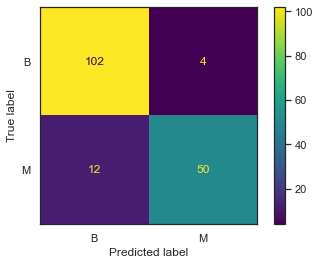

In [113]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

sns.set(style="white")
# plot_confusion_matrix(model, X_test, y_test) 
# |TN|FP|
# |FN|TP|

ConfusionMatrixDisplay.from_predictions(
      y_test, y_pred,display_labels=['B','M'])
plt.show() 

0.9259259259259259

In [90]:
# Building a text report showing the main classification metrics.

print('='*20,'Testing Set Results','='*20)
report_testing_dtree = classification_report(y_test, y_pred, target_names=['B','M'])
print(report_testing_dtree)
print('='*60)

==================== Testing Set Results ====================
              precision    recall  f1-score   support

           B       0.96      0.89      0.93       114
           M       0.81      0.93      0.86        54

    accuracy                           0.90       168
   macro avg       0.88      0.91      0.89       168
weighted avg       0.91      0.90      0.91       168



[sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) Text summary of the precision, recall, F1 score for each class. 
The support is the number of occurrences of each class in y_train or y_test.
The reported averages include macro average (averaging the unweighted mean per label) and weighted average (averaging the support-weighted mean per label)



<div class="alert alert-block alert-warning" style='color:black'>


<b>In our case, the value of Recall of positive class (SEN) is considered a primary value, as the goal is to identify all cases of really positive (malignant tumor) minimizing false negative (e.g. I predict benign tumor but the patient has a malignant tumor)</b>. The malignant '1' tumors have positive class and those benign '0' negative class.
False positive (Malignant cancer incorrectly identified as Benign) can be identified by further investigation by doctors.
</div>

In [114]:
print('='*20,'Training Set Results','='*20)
print(classification_report(y_train, model.predict(X_train), target_names=['B','M']))

==================== Training Set Results ====================
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       246
           M       1.00      1.00      1.00       143

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



In [19]:
# from src.utils import plot_decision_tree
# plot_decision_tree(model, X_train, y_train, df_X.columns)

In [20]:
# # 1. instantiate model
# model = DecisionTreeClassifier(random_state=42) 

# # 2. remove outliers
# X_train_no_outliers = X_train[(np.abs(X_train)<3).all(axis=1)]
# y_train_no_outliers = y_train[(np.abs(X_train)<3).all(axis=1)]
# print("How many outliers?",len(X_train_raw)-len(X_train_no_outliers))

# # 3. fit model to data (training)
# model.fit(X_train_no_outliers, y_train_no_outliers)   
# # 4. predict on new data 
# y_pred = model.predict(X_test) 

# # 5. evaluation
# print('='*5,'Testing Set Results (No Outliers in Training)','='*5)
# print(classification_report(y_test, y_pred))
# print('='*60)

## Random Forest

---
`The anecdote of the Wisdom of the crowd.` At a 1906 country fair in Plymouth, 800 people participated in a contest to estimate the weight of an ox. Anybody won the contest, but the statistician Francis Galton observed that the median guess, 1207 pounds, was accurate within 1% of the true weight of 1198 pounds.

---

In ensemble learning theory, we combine several weak learners (or base models) models in order to create a strong learner (or ensemble model) that achieves better performances (generalize well from the training data).

[Random forests or random decision forests](https://scikit-learn.org/stable/modules/ensemble.html#forest) are an ensemble learning method for classification (or regression) that operate **by constructing a multitude of random decision trees** (decision trees are created using a subset of the input feature) at training time and **outputting the class that is the mode of the classes** (classification) or mean prediction (regression) of the individual trees. 
 
![](images/Random_forest_diagram_complete.png)




In [21]:
from sklearn.ensemble import RandomForestClassifier

# 1. instantiate model Random Forest with 50 decision trees
model = RandomForestClassifier(n_estimators=50,random_state=42) 
# 2. fit model to data
model.fit(X_train, y_train)   
# 3. predict on new data
y_pred = model.predict(X_test)    

# # drawing decision boundary  (only for teaching)
# draw_boundary(RandomForestClassifier(n_estimators=50,random_state=42) ,  X_train,X_test,y_train,y_test )

# 4. Evaluation (Comparison with decision tree model)
print('='*20,'Testing DECISION TREE Results','='*20)
print(report_testing_dtree)

print('='*20,'Testing RANDOM FOREST Results','='*20)
print(classification_report(y_test, y_pred))
print('='*60)

==================== Testing DECISION TREE Results ====================
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       106
           1       0.93      0.81      0.86        62

    accuracy                           0.90       168
   macro avg       0.91      0.88      0.89       168
weighted avg       0.91      0.90      0.90       168

==================== Testing RANDOM FOREST Results ====================
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       106
           1       0.96      0.85      0.91        62

    accuracy                           0.93       168
   macro avg       0.94      0.92      0.93       168
weighted avg       0.94      0.93      0.93       168



**In Random Forest, multiple overfitting estimators can be combined to reduce the overfitting effect and find a better classification**

<div class="alert alert-block alert-warning" style='color:black'>
<b>NOTE:</b>
Since our model does not have huge data set, testing set is left with few observations to lead any real conclusion.
    </div>
    
<!--  <div class="alert alert-block alert-info" style='color:black'> -->

<!-- One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the previous case, the 30% of the dataset does not contribute to the training of the model! This is not optimal, and can cause problems especially if the initial set of training data is small. -->
One way to address this is to use <a href="https://en.wikipedia.org/wiki/Cross-validation_(statistics)" >Cross-Validation</a>
<!-- </div> -->

## Cross validation
**Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It combines (averages) measures of performace in prediction on different iterations to obtain a more accurate estimate of model prediction performance.**


- K-fold Cross-Validation scheme randomly divides the set of observations into k equal sized subsamples:
     - 1 subsample is used for testing the model
     - k − 1 subsamples are used as training data
 - The process is then repeated k times with each of the k subsamples used exactly once as testing data.
 - The k results can then be averaged to produce a single estimation to give an estimate of the model's predictive performance.

Visually, it might look something like this:

<img src='images/K-fold_cross_validation.png' >

 <div class="alert alert-block alert-info" style='color:black'>
<b>Tip</b>
When you have a small dataset, it recommended to use cross-validation scheme to estimate the global predictive power of a learning algorithm. 

</div>



We will use [*StratifiedKFold()*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold) which is a variation of k-fold which returns stratified folds. 

<img src='images/stratifiedKFold_2.png'>

In [22]:
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics

def cv_scores_explained(model, X, y):
    # Stratified 5 folds 
    cv = StratifiedKFold(n_splits=5)
    
    # Lists to store scores by folds 
    recalls_train, recalls_test, f1_test, acc_test = list(), list(), list(), list()
    
    # for each round fitting model on K-1 folds and test it on 1 fold        
    for train_index, test_index in cv.split(X, y): # split() generate indices to split data into training and test set.
        
        ## 1. getting data for each round ##
        X_train = X[train_index, :]  # features data for fitting model        
        X_test  = X[test_index, :]   # features data for testing model
        y_train = y[train_index]     # target vector for fitting model    
        y_test  = y[test_index]      # target vector for testing model
        
               
        ## 2. data scaling ##  
        scaler = StandardScaler()
        # fitting and scaling a StandardScaler
        X_train = scaler.fit_transform(X_train) # learn the parameters and scaling  
        # scaling on test set
        X_test = scaler.transform(X_test) # scaling using training parameters
        
        ## 3. fit model on training set ##
        model.fit(X_train, y_train)
        
        ## 4. prediciton on test set ##
        y_pred = model.predict(X_test)
        
        ## 5. evalution model ##
        # getting testing accuracy, f1 and recall score 
        acc = metrics.accuracy_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)        
        # getting training recall score 
        y_train_pred = model.predict(X_train)
        recall_training = metrics.recall_score(y_train, y_train_pred)
        
        ## 6. saving partial 'fold' results ##
        recalls_test.append(recall)
        acc_test.append(acc)
        f1_test.append(f1)
        recalls_train.append(recall_training)
        
    return pd.DataFrame({'train_recall':recalls_train, 'test_recall':recalls_test,'test_f1':f1_test,'test_accuracy':acc_test}) 

In [23]:
X = df_X.values  # Features matrix
y = df_y.values # target array
estimator = DecisionTreeClassifier(random_state=42)
cv_scores_explained(estimator,X,y).mean()

train_recall     1.000000
test_recall      0.902439
test_f1          0.898455
test_accuracy    0.924550
dtype: float64

In [24]:
X = df_X.values  # Features matrix
y = df_y.values # target array
estimator = DecisionTreeClassifier(random_state=42)
cv_scores_explained(estimator,X,y).mean()

train_recall     1.000000
test_recall      0.902439
test_f1          0.898455
test_accuracy    0.924550
dtype: float64

The [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function:
* allows specifying multiple metrics for evaluation.
* returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score.

In [25]:
from sklearn.model_selection import cross_validate
# A Pipeline makes it easier to compose estimators, providing this behavior under cross-validation:
from sklearn.pipeline import make_pipeline
    
def cv_scores(model, xvalues, yvalues):
    """
    Evaluate metric(s) by cross-validation 
    Return CV scores and scores of the model for each run of the cross validation.
    """

    # for the complete metrics:  https://scikit-learn.org/stable/modules/model_evaluation.html
    scoring=('recall','precision','accuracy', 'f1') # accuracy,recall, precision, f1 on positive class 
    
    # Also in cross-validation, data transformations should be learned from a training set and applied to held-out data for prediction 
    clf = make_pipeline(StandardScaler(), model)
    
    # cross_validate uses Stratified 5 folds (80%-20% splitting data) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    cv_results = cross_validate(clf, xvalues, yvalues, cv=5, return_train_score=True, scoring=scoring)
    
    # Folds scores
    df_folds = pd.DataFrame(cv_results)        
    df_cv_scores = df_folds[sorted(cv_results.keys())].mean() # CV scores
    df_cv_scores['model'] = type(model).__name__
    
    return  df_cv_scores, df_folds



In [26]:
X = df_X.values  # Features matrix
y = df_y.values # target array
estimator = DecisionTreeClassifier(random_state=42)
df_dtree_cv, df_folds = cv_scores(estimator,X,y)
# df_dtree_cv
df_folds.mean()

fit_time           0.006783
score_time         0.003994
test_recall        0.902439
train_recall       1.000000
test_precision     0.897134
train_precision    1.000000
test_accuracy      0.924550
train_accuracy     1.000000
test_f1            0.898455
train_f1           1.000000
dtype: float64

Decision tree model is an over fit. There are big differences between training scores and testing scores.

In [27]:
estimator = RandomForestClassifier(n_estimators=50,random_state=42)
df_rf_cv, _  = cv_scores(estimator,X,y)
df_rf_cv

fit_time                         0.079569
score_time                        0.00748
test_accuracy                    0.958736
test_f1                          0.941984
test_precision                   0.975238
test_recall                      0.912195
train_accuracy                        1.0
train_f1                              1.0
train_precision                       1.0
train_recall                          1.0
model              RandomForestClassifier
dtype: object

In [28]:
# Test scores comparison
df_cv_scores = pd.DataFrame([df_dtree_cv,df_rf_cv])
df_cv_scores[['model','test_accuracy','test_f1','test_precision','test_recall']].style.background_gradient(cmap='Blues')

,model,test_accuracy,test_f1,test_precision,test_recall
0,DecisionTreeClassifier,0.924550,0.898455,0.897134,0.902439
1,RandomForestClassifier,0.958736,0.941984,0.975238,0.912195


Random Forest Classifier mitigates the overfitting problem reducing the difference between training and testing scores, but we can do better

Let's Go to pump our model!
![](images/model_tuning.png)

# Model Tuning 


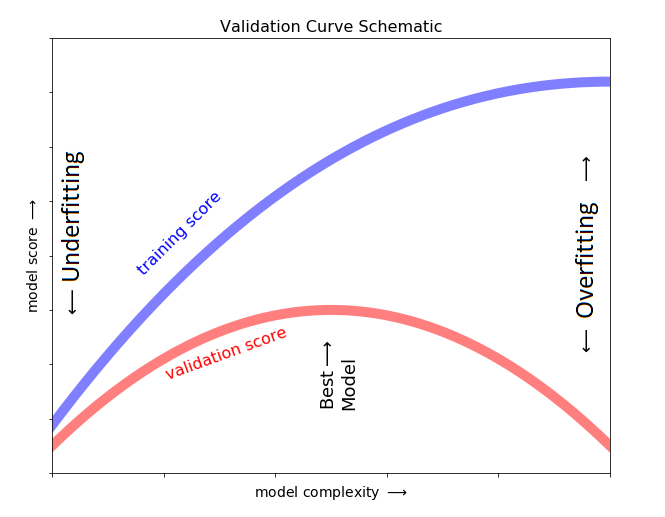Overfitting is caused by making a model more complex than necessary.

![](images/overfitting.jpg)

The Model's ability to generalize to new data is based on factors such as:
- the complexity of the model
- the model's performance on training data respect on test set

We must find the trade-off between fitting our data well, but also fitting the data as simply as possible. 

![](images/validation.png)

 
<!-- In first article of Stephanie and Tony on R2D3, we created a model that distinguishes homes in San Francisco from those in New York. In the [second article](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/), they will talk about tuning and the Bias-Variance tradeoff. -->

In the previous section, we saw the basic recipe for applying a supervised machine learning model. Now we can complete the recipe by adding Hyperparameters tuning to deal with the overfitting problem:
1. Choose a class of model
2. **Choose best model hyperparameters**
3. Fit the model to the training data
4. Use the model to predict labels for new data

In machine learning, a **hyperparameter is a parameter whose value is used to control the learning process and complexity of the model**. 

<!-- The choice of model and choice of hyperparameters are the most important part of using these tools and techniques effectively. -->
In order to make an informed choice, we need a way to validate that our model and our hyperparameters are a good fit to the data.
To do this, **we need to retain some subset of training data (validation set) to evaluate the performance of the model to changes in its hyperparameters.**

<!-- ![](img/splitting_validation.png) -->
<img src='images/splitting_validation.png' width='800px'>

As we have seen before, one disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. This is not optimal, and can cause problems especially if the initial set of training data is small.  Thus, to overcome this, cross validation of 5 fold is performed to validate the result.

<!-- ![](notebook/img/splitting_2.png) -->
<img src='images/splitting_2.png' width='700px'>
<!-- **Why do we need a validation set?**

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. 


 -->

## Validation Curve

**[Decision-tree learners](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) can create over-complex trees that do not generalise the data well**. This is called overfitting. 

Mechanisms such as pruning, **setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.**
[Pruning](https://en.wikipedia.org/wiki/Decision_tree_pruning) reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

![](images/pruning.png)

<img src='images/cp.png' width='620px'>
<!-- --Bias is the difference between the Predicted Value and the Expected Value
--The Variance is when the model takes into account the fluctuations in the data i.e. the noise as well. -->

We can use the [*min_samples_leaf*](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) tunable parameter to tune the decision tree model complexity and [sklearn.model_selection.validation_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve) to plot the influence of a single hyperparameter on the training score and the validation score in order to find out whether the estimator is overfitting or underfitting for some hyperparameter values.



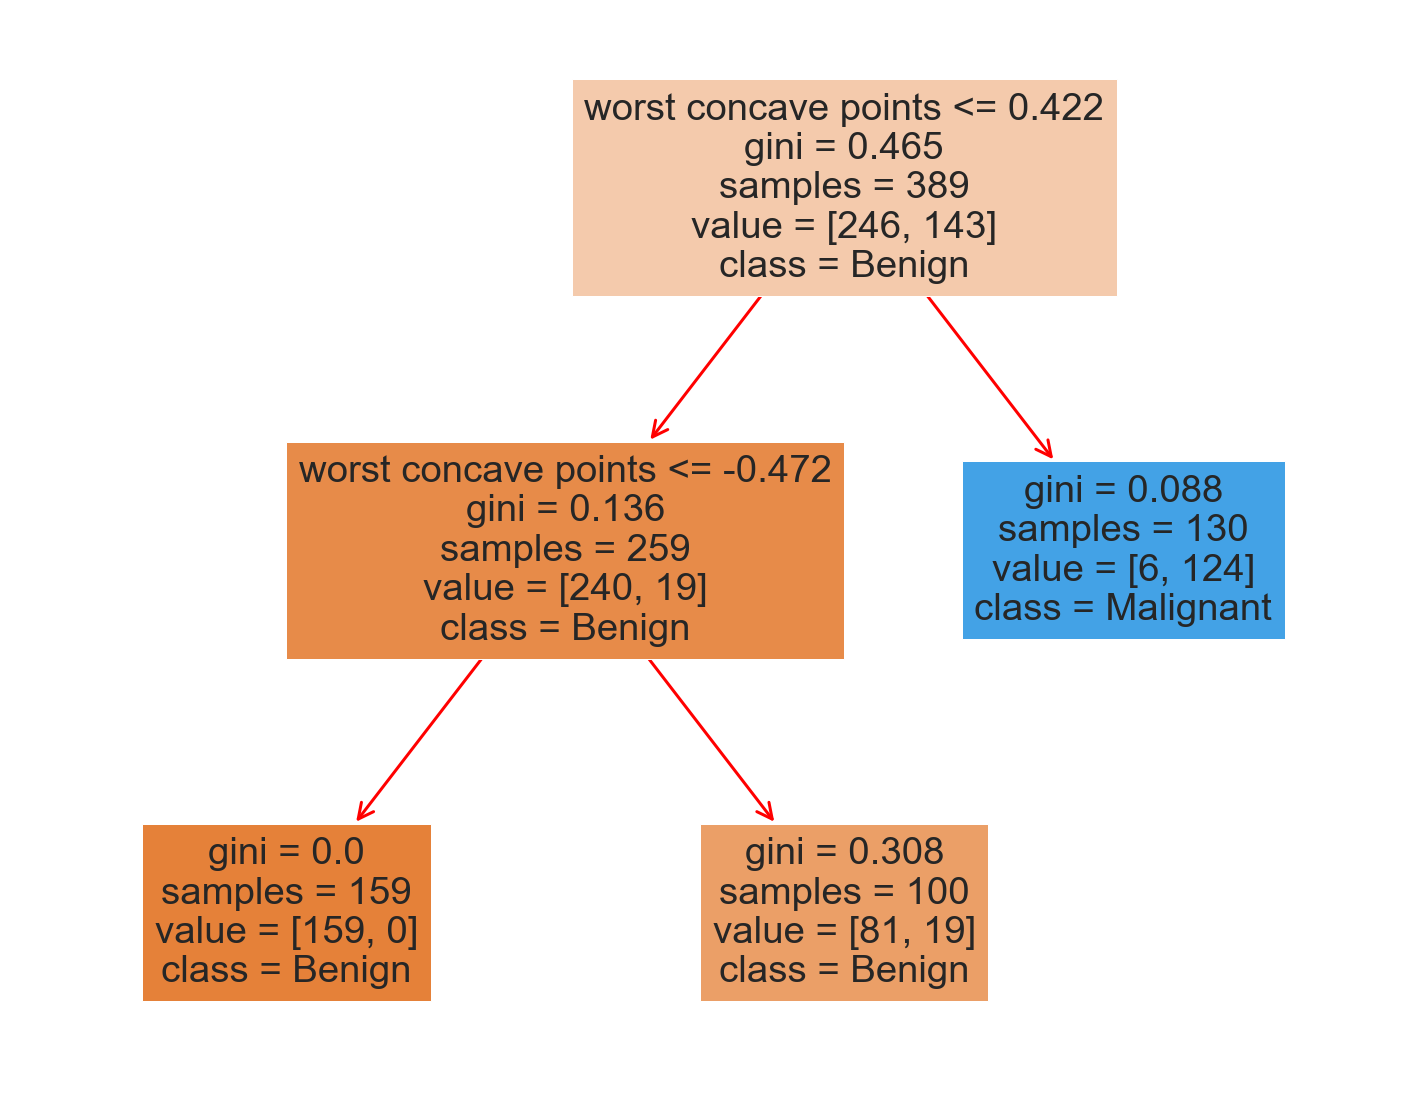

In [29]:
from src.utils import plot_decision_tree
dt = DecisionTreeClassifier(random_state = 42, min_samples_leaf=100)
dt.fit(X_train,y_train)
plot_decision_tree(dt , X_train,y_train, df_X.columns)
# evalutation
# test_score = metrics.recall_score(y_test, dt.predict(X_test))
# train_score = metrics.recall_score(y_train, dt.predict(X_train))
# print(f'Train score {train_score:.2f}, Test score {test_score:.2f}')

[1, 5, 9, 13, 17, 21, 25, 29, 33]


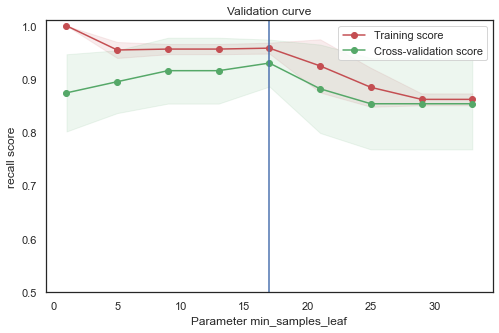

In [30]:
from src.utils import validation_curve_model
dtree =  DecisionTreeClassifier(random_state = 42)

param_range = range(1,34,4) 
print(list(param_range))
param_name="min_samples_leaf"
ylim=[0.50, 1.01]


sns.set(style="white")
validation_curve_model(X_train,y_train, dtree, param_name, param_range, cv=5, ylim=ylim )

plt.show()

The chart above  is validation curve, and we see the following essential features:
* The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
* **For very high model complexity (a high-variance model, min_samples_leaf value from 1 to 13), the training data is overfit**, which means that the model predicts the training data very well, but fails for any previously unseen data.
* **For very low model complexity (a high-bias model, min_samples_leaf value after 20), the training data is underfit**, which means that the model is a poor predictor both for the training data and for any previously unseen data.
* For some intermediate value, **the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance is 17**

## Grid Search
 In practice, models generally have more than one knob to turn, and thus plots of
validation  curves change from lines to multidimensional surfaces. 

Grid Search tries all the possible combinations of parameter values (knobs to turn) which are evaluated using CV and the best combination is retained.


<img src='images/grid_search.png' width='400' />

In [31]:

print({"min_samples_leaf": list(range(1,30,2)), # len = 15
        "min_samples_split":list(range(2,8,1)), # len = 6
        "max_depth": list(range(1,20,2)) # len = 10
       })
# all possibile combinations = 15 * 10 * 6 = 900 

{'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'min_samples_split': [2, 3, 4, 5, 6, 7], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}


[*sklearn.model_selection.GridSearchCV*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html): Exhaustive search over specified parameter values for an estimator.

In [32]:
dtree =  DecisionTreeClassifier(random_state = 42)

parameters_grid={"min_samples_leaf": range(1,30,2),
                 "min_samples_split":range(2,8,1),
                 "max_depth": range(1,20,2)
               }
 
from sklearn.model_selection import GridSearchCV
#(Stratified)5Fold,
clf = GridSearchCV(dtree, parameters_grid, scoring='recall',n_jobs=4, verbose=2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 30, 2),
                         'min_samples_split': range(2, 8)},
             scoring='recall', verbose=2)

In [33]:
print('Recall score ', clf.best_score_, ' with ', clf.best_params_)


Recall score  0.9300492610837438  with  {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 2}


In [34]:
dt = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=17, min_samples_split=2)
dt.fit(X_train,y_train)
#plot_decision_tree(dt , X_train,y_train, df_X.columns)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=17, random_state=42)

In [35]:
# Evalution on Test Set
dtree = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_leaf=17, min_samples_split=2)
dtree.fit(X_train, y_train)    
print('='*20,'Testing Fine-Tuned DecisionTree Results','='*20)
print(classification_report(y_test, dtree.predict(X_test) ))

# Evalution using Cross Validation
print('='*20,'Cross Validation Fine-Tuned DecisionTree ','='*20)
df_tuned_dtree_cv, _ = cv_scores(dtree,X,y)
df_tuned_dtree_cv['model'] = 'Fine-Tuned DecisionTree'
df_tuned_dtree_cv

==================== Testing Fine-Tuned DecisionTree Results ====================
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       106
           1       0.89      0.89      0.89        62

    accuracy                           0.92       168
   macro avg       0.91      0.91      0.91       168
weighted avg       0.92      0.92      0.92       168

==================== Cross Validation Fine-Tuned DecisionTree  ====================


fit_time                          0.007094
score_time                        0.004878
test_accuracy                     0.928282
test_f1                           0.903824
test_precision                    0.896725
test_recall                       0.912195
train_accuracy                    0.944795
train_f1                          0.925292
train_precision                   0.921372
train_recall                      0.930488
model              Fine-Tuned DecisionTree
dtype: object

### Random Forest


In [36]:
rf =  RandomForestClassifier(random_state = 42)

parameters_grid={"min_samples_leaf": range(1,10,2),
                 "min_samples_split":range(2,6,1),
                 "max_depth": range(1,10,2),
                 "n_estimators": range(20,101,20)
               }
 
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(rf, parameters_grid,scoring='recall',n_jobs=4,verbose=2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 6),
                         'n_estimators': range(20, 101, 20)},
             scoring='recall', verbose=2)

In [37]:
print('Recall score ', clf.best_score_, ' with ', clf.best_params_)

Recall score  0.9507389162561577  with  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [38]:
X = df_X.values  # Features matrix
y = df_y.values 

# Evalution on Test Set
model = RandomForestClassifier(random_state=42, max_depth=5, min_samples_leaf=1, min_samples_split=2,n_estimators=20) 
model.fit(X_train, y_train)    
print('='*20,'Testing Fine-Tuned RandomForest Results','='*20)
print(classification_report(y_test, model.predict(X_test) ))

# Cross Validation
print('='*20,'Cross Validation Fine-Tuned RandomForest ','='*20)
df_tuned_rf_cv, _ = cv_scores(model,X,y)
df_tuned_rf_cv['model'] = 'Fine-Tuned RandomForest'
df_tuned_rf_cv

==================== Testing Fine-Tuned RandomForest Results ====================
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       106
           1       0.96      0.84      0.90        62

    accuracy                           0.93       168
   macro avg       0.94      0.91      0.92       168
weighted avg       0.93      0.93      0.93       168

==================== Cross Validation Fine-Tuned RandomForest  ====================


fit_time                          0.029358
score_time                        0.004007
test_accuracy                     0.960537
test_f1                           0.945133
test_precision                    0.971196
test_recall                       0.921951
train_accuracy                    0.991022
train_f1                          0.987711
train_precision                   0.995062
train_recall                      0.980488
model              Fine-Tuned RandomForest
dtype: object

In [39]:
df_cv_scores = pd.DataFrame([df_dtree_cv,df_tuned_dtree_cv, df_rf_cv,df_tuned_rf_cv]).sort_values('test_recall', ascending=False)
df_cv_scores[['model','test_accuracy','test_f1','test_precision','test_recall',]].style.background_gradient(cmap='Blues')

,model,test_accuracy,test_f1,test_precision,test_recall
3,Fine-Tuned RandomForest,0.960537,0.945133,0.971196,0.921951
2,RandomForestClassifier,0.958736,0.941984,0.975238,0.912195
1,Fine-Tuned DecisionTree,0.928282,0.903824,0.896725,0.912195
0,DecisionTreeClassifier,0.924550,0.898455,0.897134,0.902439


Fine-Tuned RandomForest models has 92.2% recall

## Save and Load Models
Pickle is the standard way of serializing objects in Python.

In [40]:
import pickle
model_path = 'data'
# save models
pickle.dump(scaler, open(f"{model_path}/scaler", 'wb'))
pickle.dump(model, open(f"{model_path}/best_trained_model", 'wb')) 

# load models
loaded_scaler = pickle.load(open(f"{model_path}/scaler", 'rb')) 
loaded_model = pickle.load(open(f"{model_path}/best_trained_model", 'rb')) 



In [41]:
sampleX = df_X.sample(2)
make_pipeline(loaded_scaler,loaded_model).predict(sampleX) # Apply transforms to the data, and predict with the final estimator
# loaded_model.predict(loaded_scaler.transform(sampleX))

array([0, 0], dtype=int64)

## Machine Learning Pipeline
Below is a flowchart of typical workflow in model training. The best parameters can be determined by grid search techniques.

<img src='images/grid_search_workflow.png' width='400' />

In [42]:
import numpy as np
from sklearn.datasets import load_breast_cancer # to load the dataset
from sklearn.preprocessing import StandardScaler #for Scaling the features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from IPython.display import display, Markdown 
import pickle

class MLPipeline():
    
    def __init__(self,model,test_size=0.3,k_folds=5):
        self.model = model
        self.model_name = type(model).__name__
        self.test_size = test_size
        self.k_folds = k_folds
        self.scaler = None

    def load_data(self):
        #load dataset 
        self.X,self.y = load_breast_cancer(return_X_y=True)         


    def split_data(self):
        # Splitting train and test data 
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.y, test_size=self.test_size, stratify=self.y, random_state=1)
        
    def preprocessing(self):
        # Scaling features
        self.scaler = StandardScaler()
        self.X_train =self.scaler.fit_transform(self.X_train)              
        self.X_test =self.scaler.transform(self.X_test) 
        
    def parameter_tuning(self, parameters):
        # GridSearchCV to find optimal parameters
        grid = GridSearchCV(self.model, parameters, cv=self.k_folds)
        grid.fit(self.X_train, self.y_train)

        # Getting optimal parameters
        self.best_score = grid.best_score_   
        self.best_params= grid.best_params_
        self.best_model = grid.best_estimator_        
        

    def model_evaluation(self):
        # Getting train and test accuracy        
        self.best_model.fit(self.X_train, self.y_train)
        self.train_accuracy = self.best_model.score(self.X_train, self.y_train)
        self.test_accuracy = self.best_model.score(self.X_test, self.y_test)
        
    def k_fold_cross_validation(self):
        # Model definition
        if self.scaler:
            pipeline = make_pipeline(StandardScaler(),self.best_model)
        else:
            pipeline = self.best_model
        # Applying k-fold and getting scores
        self.kfold_scores = cross_val_score(pipeline, self.X, self.y, cv=self.k_folds)
        
    def save_model(self,model_path):
        # Save optimum model and Scaler
        if self.scaler:
            pickle.dump(self.scaler,  open(f"{model_path}/StandardScaler", 'wb'))
        pickle.dump(self.tree, open(f"{model_path}/best_model", 'wb'))        

    def markdown_report(self):
        display(Markdown(
        f"""---
        \n Model: {self.model_name}
        \nDataset size {len(self.X)}, Test size {self.test_size*100:.1f}% 
        \n*Optimal parameters (GridSearchCV {self.k_folds}-Folds ):*
        \n   - Best params **{self.best_params}**
        \n   - Accuracy **{self.best_score:.2f}** 
        \n*Model_evaluation (test size {self.test_size*100:.1f}%):*
        \n   -  Train accuracy **{self.train_accuracy:.2f}**
        \n - Test accuracy **{self.test_accuracy:.2f}**
        \n*Cross Validation Score :*
        \n   - Avarage Accuracy **{np.mean(self.kfold_scores):.2f}**   +/-{np.std(self.kfold_scores):.2f} \n---""" ))
   

 
    

In [43]:
model = DecisionTreeClassifier(random_state=1)
parameters_grid = {'criterion': ['gini','entropy'], 'splitter': ['best','random'], 'max_depth': [2,3,4]}

pipeline = MLPipeline(model=model)
pipeline.load_data()
pipeline.split_data()
pipeline.preprocessing()
pipeline.parameter_tuning(parameters_grid)
pipeline.model_evaluation()
pipeline.k_fold_cross_validation()
# pipeline.save_model('data')
pipeline.markdown_report()

---
        
 Model: DecisionTreeClassifier
        
Dataset size 569, Test size 30.0% 
        
*Optimal parameters (GridSearchCV 5-Folds ):*
        
   - Best params **{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}**
        
   - Accuracy **0.95** 
        
*Model_evaluation (test size 30.0%):*
        
   -  Train accuracy **0.97**
        
 - Test accuracy **0.95**
        
*Cross Validation Score :*
        
   - Avarage Accuracy **0.93**   +/-0.02 
---

<div class="alert alert-block alert-warning" style='color:black'>
    <b>NOTE:</b>
In an ideal world, you should have an independent test set to verify the performance of your model. 
Sometimes it happens that our dataset is not large enough to be divided into training, validation, and testing sets, so people use cross-validation to use as much data as possible for both, training and testing.</div>

# APPENDIX




## Handling Imbalanced Datasets
Imbalanced datasets are those where there is a severe skew in the class distribution.This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. 

There are two major groups of selection algorithms:

- the under-sampling method by randomly selecting a given number of samples from the majority class.
- the over-sampling methods by repeating some samples (or use some heuristic) and balance the number of samples between the dataset

Below, how to use sampling techniques implemented in the [imbalanced-learn Python library](https://imbalanced-learn.org/stable/) to deal with imbalanced datasets.

In [44]:
import sys
!{sys.executable} -m pip install  install imbalanced-learn 

You should consider upgrading via the 'C:\Users\d.licari\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [45]:
pd.Series(y_train).value_counts()

0    246
1    143
Name: target, dtype: int64

In [46]:
# under-sampling
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=0)
X_res_u, y_res_u = sampler.fit_resample(X_train, y_train)   
pd.Series(y_res_u).value_counts()

0    143
1    143
Name: target, dtype: int64

In [47]:
#  over-sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

sampler = RandomOverSampler(random_state=0)
X_res_os, y_res_os = sampler.fit_resample(X_train, y_train)   
pd.Series(y_res_os).value_counts()

0    246
1    246
Name: target, dtype: int64

In [48]:
#  over-sampling using a heuristic
#instead repeating the same samples when over-sampling, we can use some specific heuristic instead like SMOTE to create synthetic data
sampler = SMOTE(random_state=0) # Synthetic Minority Oversampling Technique https://arxiv.org/pdf/1106.1813.pdf
X_res_smote, y_res_smote = sampler.fit_resample(X_train, y_train)   
pd.Series(y_res_smote).value_counts()

0    246
1    246
Name: target, dtype: int64

In [49]:
imb_dataset = {'RandomUnderSampler':(X_res_u, y_res_u),
              'RandomOverSampler':(X_res_os, y_res_os),
               'SMOTE':(X_res_smote, y_res_smote)}
for n, d in imb_dataset.items():
    model.fit(d[0], d[1])  #fit model to data (training)
    y_pred = model.predict(X_test) #predict on new data 

    # evaluation
    print('='*10,f'Testing Set Results ({n})','='*10)
    print(classification_report(y_test, y_pred))
    print('='*60)

========== Testing Set Results (RandomUnderSampler) ==========
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       106
           1       0.85      0.81      0.83        62

    accuracy                           0.88       168
   macro avg       0.87      0.86      0.86       168
weighted avg       0.87      0.88      0.87       168

========== Testing Set Results (RandomOverSampler) ==========
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       106
           1       0.90      0.84      0.87        62

    accuracy                           0.90       168
   macro avg       0.90      0.89      0.90       168
weighted avg       0.90      0.90      0.90       168

========== Testing Set Results (SMOTE) ==========
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       106
           1       0.91      0.82      0.86        62

    acc

## Features importance   

The importance of a feature is computed as the (normalized) total
reduction of the criterion brought by that feature.
It is also known as the Gini importance.



Many model forms describe the underlying impact of features relative to each other. In scikit-learn, Decision Tree models and ensembles of trees such as Random Forest, Gradient Boosting, and Ada Boost provide a feature_importances_ attribute when fitted.

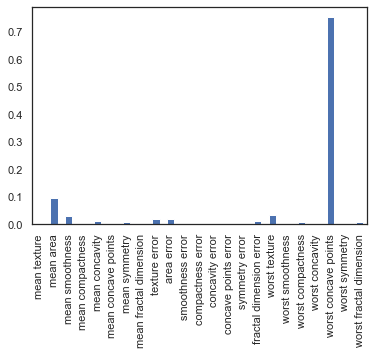

In [50]:
model = DecisionTreeClassifier(random_state=42) 
# 2. fit model to data (training)
model.fit(X_train, y_train)   

pd.Series(dict(zip(df_X.columns,model.feature_importances_ ))).plot(kind='bar')
plt.show()

Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values).  
    
:func:`sklearn.inspection.permutation_importance` as an alternative.

[sklearn.inspection.permutation_importance](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html)
First, a baseline metric, defined by scoring, is evaluated on a (potentially different) dataset defined by the X. Next, a feature column from the validation set is permuted and the metric is evaluated again. The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column.

worst concave points 0.117 +/- 0.026
mean concavity 0.112 +/- 0.017
mean area 0.056 +/- 0.018
worst texture 0.022 +/- 0.010
area error 0.022 +/- 0.009


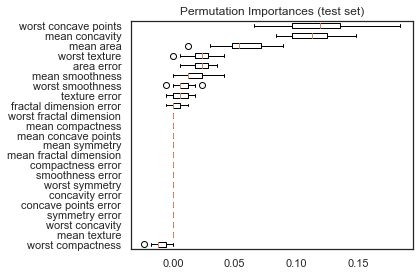

In [51]:
# %load_ext autoreload 
# %autoreload 2
from src.utils import get_importance_features
get_importance_features(model, X_test, y_test, df_X.columns)

## Model Tuning

In [52]:
from IPython.display import display, HTML,IFrame 
IFrame(src="http://www.r2d3.us/visual-intro-to-machine-learning-part-2/", width=1200, height=650)


## Predictive Models

### Logistic regression
Logistic regression is called a generalized linear models. ie.: it is a linear model with a link
function that maps the output of linear multiple regression to the posterior probability of class
1 𝑝(1|𝑥) using the logistic sigmoid function: 𝑝(1|𝑤, 𝑥𝑖) = 1/1 + exp(−𝑤 · 𝑥𝑖)

### K-Nearest Neighbor
In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small)." [ wiki](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

### Support Vector - linear
It simply finds a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other. A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. [wiki](https://en.wikipedia.org/wiki/Support_vector_machine)
 
### Naive Bayes
It relies on Bayes's theorem. In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$. 
 Such a model is called a generative model because it specifies the hypothetical random process that generates the data. In Gaussian Naive Bayes classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. Gaussian distribution is used as prior probability distribution to compute the posterior probability  $P(L~|~{\rm features})$
 
### Gradient Boosting
Gradient boosting is an ensemble algorithm that fits boosted decision trees by minimizing an error gradient.
Decision trees can be added together (sequentially) to correct for errors in the predictions. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier.

### Neural Network
A MultiLayer Perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of at least three layers of nodes. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


# define a dictory for classifier and their paramaters range
dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(random_state=42,max_iter=1000),
                'params' : [
                            {
                             'penalty': ['l1','l2'],
                             'C': [0.01,0.1,1,10,100],
                                
                            }
                           ]
            },
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                 'params': [
                            {
                            'n_neighbors': [1, 3, 5, 10],
                            'leaf_size': [3, 30]
                            }
                           ]
            },
             
    "Linear SVM": 
            {'classifier': SVC(random_state=42),
                 'params': [
                            {
                             'C': [1, 10, 100],
                             'gamma': [0.001, 0.0001],
                             'kernel': ['linear']
                            }
                           ]
            },
    "Gradient Boosting": 
            {'classifier': GradientBoostingClassifier(random_state=42),
                 'params': [
                            {
                             'learning_rate': [0.05, 0.1],
                             'n_estimators' :[50, 100, 200],
                             'max_depth':[3,7]
                            }
                           ]
            },
    "Decision Tree":
            {'classifier': DecisionTreeClassifier(random_state=42),
                 'params': [
                            {
                             'min_samples_leaf':[17], 
                             'min_samples_split': [2],
                             'max_depth':[3,7]
                            }
                             ]
            },
    "Random Forest": 
            {'classifier': RandomForestClassifier(random_state=42),
                 'params': {
                            'n_estimators' :[20,50],
                            'max_depth':[3,7],
                            'min_samples_leaf': [1], 
                            'min_samples_split': [3]
                           }
            },
    "Naive Bayes": 
            {'classifier': GaussianNB(),
                 'params': {}
            },
    "Neural Network":
            {'classifier': MLPClassifier(random_state=42),
                 'params': {
                     'hidden_layer_sizes': [(100,),(50,50), (20,10,10,10)],
                     'max_iter':[600,1000]
                 }
            }
    
}

In [54]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def evalution_classifiers(dict_classifiers, X,y,scaler=True, verbose = False ):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, stratify=y, random_state=10) 
    model_scores = {}
    
    if scaler:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train) # computes variance and mean of each feature and scaling. 
        X_test  = scaler.transform(X_test)  # scales the test data.
    
    for clf_name, classifier in dict_classifiers.items():
        print(f"= Training {clf_name} =")
        
        # computing GridSearchCV for search the best parameters
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      scoring='recall',n_jobs=4, refit=True) 
        grid.fit(X_train,y_train)
        
        # using the best model (with best parameters) for evalaution
        df_report = pd.DataFrame(classification_report(y_true = y_test, y_pred = grid.best_estimator_.predict(X_test), output_dict=True))
        model_scores[clf_name] = df_report
        


        if verbose:
            print(f" - Best params {grid.best_params_}")
            print(df_report)

    return model_scores

In [55]:
import pandas as pd
from sklearn.metrics import classification_report
X,y = load_breast_cancer(return_X_y=True) 
df_cv_scores = evalution_classifiers(dict_classifiers, X,y)
recall_scores = [(k, v.iloc[1,1]) for k,v in df_cv_scores.items()]
print("RECALL")
recall_scores

= Training Logistic Regression =
= Training Nearest Neighbors =
= Training Linear SVM =
= Training Gradient Boosting =
= Training Decision Tree =
= Training Random Forest =
= Training Naive Bayes =
= Training Neural Network =
RECALL


[('Logistic Regression', 0.9906542056074766),
 ('Nearest Neighbors', 0.9906542056074766),
 ('Linear SVM', 0.9906542056074766),
 ('Gradient Boosting', 0.9719626168224299),
 ('Decision Tree', 0.9158878504672897),
 ('Random Forest', 0.9532710280373832),
 ('Naive Bayes', 0.9532710280373832),
 ('Neural Network', 0.9813084112149533)]

## Regression
### Decision Tree Regressor
The process of solving regression problem with decision tree (DecisionTreeRegressor class) using Scikit Learn is very similar to that of classification. 

Differences to Decision Trees:
* Splitting criterion: minimizing error (|True values – Predicted values|)
* Leaf node predicts average target values of training instances reaching that node 

The evaluation metrics for regression differ from those of classification. The rest of the process is almost same.

Metrics:
* Mean Absolute Error (MAE) = 1/n Σ|True values – Predicted values|
* Mean Squared Error (MSE) = 1/n Σ(True values – Predicted values)**2
* Root Mean Squared Error (RMSE) = sqrt(MSE)


In [56]:
from sklearn.datasets import load_diabetes

print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [57]:
## DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
# X, y = load_diabetes(return_X_y=True)
df = load_diabetes(as_frame=True)
X = df['data']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [58]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 71.35955056179775
Mean Squared Error: 7022.9775280898875
Root Mean Squared Error: 83.80320714680249


### RandomForestRegressor
It's similar to RandomForestClassifier, but it combines DecisionTreeRegressor and outputs the average of the individual predictions

In [59]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 47.92044943820226
Mean Squared Error: 3769.47091011236
Root Mean Squared Error: 61.3960170541409


# Next Lesson
Please follow the instructions **[HERE](https://github.com/EMbeDS-education/SNS-IProML2021/wiki/Setup-your-machine#install-knime-analytics-platform)** to install *KNIME Analytics Platform*

